### 坐标系统转换
### 1. reproject vector

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
path_vec = 'data/data-base/vector/China-Province/province.shp'


In [8]:
data_vec = gpd.read_file(path_vec)
data_vec.head()

,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.89226 39.69491, 116.89227 39.694..."
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((113.77712 36.63947, 113.78080 ..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((113.56331 36.58910, 113.55295 ..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((114.04201 40.60888, 114.04441 40.611..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((119.25798 42.22412, 119.25568 42.220..."


In [9]:
print(data_vec.crs)
print(data_vec.total_bounds)


EPSG:4326
[ 73.502355   3.83703  135.09567   53.563624]


In [5]:
def get_utm_zone(lon):
  zone = int(lon/6)+31
  return zone
utm_zone = get_utm_zone(lon=104)
print(utm_zone)

48


In [10]:
data_vec_utm48 = data_vec.copy()
data_vec_utm48 = data_vec_utm48.to_crs(epsg=32648)
data_vec_utm48.head()


,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((1520948.491 4462107.434, 1520952.641..."
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((1285509.516 4090946.792, 12858..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((1266836.720 4083597.196, 12659..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((1265405.550 4534829.581, 1265581.817..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((1677752.153 4774225.669, 1677637.722..."


In [11]:
print(data_vec_utm48.crs)


EPSG:32648


/Users/luo/miniconda3/envs/venv/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/luo/miniconda3/envs/venv/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'wgs84/utm48')

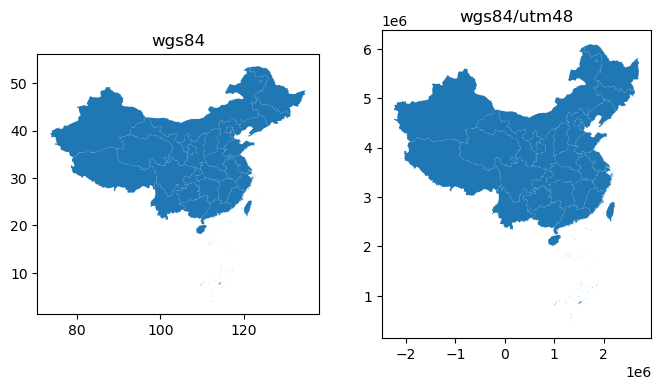

In [35]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
data_vec.plot(ax=ax[0])
ax[0].set_title('wgs84')
data_vec_utm48.plot(ax=ax[1])
ax[1].set_title('wgs84/utm48')


In [36]:
path_vec_utm48 = 'data/data-section-4/province_reporj2utm48_geopandas.shp'
data_vec_utm48.to_file(path_vec_utm48)



### reproject raster 


In [1]:
path_img = 'data/data-base/region1_l8_20190504_wgs84.tif'


In [5]:
import rasterio
rsimg = rasterio.open(path_img)
rsimg.crs
rsimg.bounds

BoundingBox(left=87.59975392008562, bottom=32.70990528300208, right=88.31014164676733, top=33.29066611418535)

In [9]:
utm_zone = get_utm_zone(lon=88)
print(utm_zone)


45


In [17]:
path_img_utm45_rio = 'data/data-section-4/rsimg_reproj2utm45_rasterio.tif'
path_img_utm45_gdal = 'data/data-section-4/rsimg_reproj2utm45_gdal.tif'


In [26]:
### rasterio命令
!rio warp --overwrite --resampling bilinear $path_img $path_img_utm45_rio --dst-crs EPSG:32645 ## rasterio 命令行指令


In [24]:
### gdal命令
!gdalwarp -s_srs EPSG:4326 -t_srs EPSG:32645 -r bilinear $path_img $path_img_utm45


Processing data/data-base/region1_l8_20190504_wgs84.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
